In [4]:
import dload
import os
import pandas as pd
import geopandas as gpd
from datetime import datetime
from shapely.geometry import Point
import matplotlib.pyplot as plt

# get correct path for working in jupyter notebooks
__file__ = os.path.abspath('')

In [6]:
# function to download files of interest from AirNow
# description of annual summary files in Section 4 https://aqs.epa.gov/aqsweb/airdata/FileFormats.html

# what files do you want to download?
list_of_files = ['https://aqs.epa.gov/aqsweb/airdata/annual_conc_by_monitor_2024.zip']
# where do you want to save the data?
data_save = 'C:\\Users\\kferguson32\\AirNowPractice\\data\\'

def download_files(list_of_files, data_save):
    for url in list_of_files:
        dload.save_unzip(url, data_save)   

In [7]:
# function to get list of files in current working directory
def list_files_by_type(directory, file_type):
    files = []
    for filename in os.listdir(directory):
        if filename.endswith(file_type):
            files.append(filename)
    return files

In [8]:
# download the files
download_files(list_of_files, data_save)

# create a dataframe of the csv file
file_type = ".csv"
csv_files = list_files_by_type(data_save, file_type)
# right now this just creates a datframe for the first file, but I can eventually edit this to merge the dataframes
df = pd.read_csv(os.path.join(data_save,csv_files[0]))

In [23]:
#exploring dataframe attributes
unique_monitors = df['Site Num'].unique()
print(len(unique_monitors))
print(len(df.index))
print(df.shape[1])
print(df.columns)
df.head(10)

464
48603
55
Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Metric Used', 'Method Name', 'Year',
       'Units of Measure', 'Event Type', 'Observation Count',
       'Observation Percent', 'Completeness Indicator', 'Valid Day Count',
       'Required Day Count', 'Exceptional Data Count', 'Null Data Count',
       'Primary Exceedance Count', 'Secondary Exceedance Count',
       'Certification Indicator', 'Num Obs Below MDL', 'Arithmetic Mean',
       'Arithmetic Standard Dev', '1st Max Value', '1st Max DateTime',
       '2nd Max Value', '2nd Max DateTime', '3rd Max Value',
       '3rd Max DateTime', '4th Max Value', '4th Max DateTime',
       '1st Max Non Overlapping Value', '1st NO Max DateTime',
       '2nd Max Non Overlapping Value', '2nd NO Max DateTime',
       '99th Percentile', '98th Percentile', '95th Percentile',
       '90th Percentile', '75th P

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,1 HOUR,...,0.057,0.050,0.034,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-07-19
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.045,0.042,0.028,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-07-19
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.045,0.042,0.028,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-07-19
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.045,0.041,0.028,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-07-19
4,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,1 HOUR,...,8.200,5.000,0.300,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05
5,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.300,5.200,2.200,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05
6,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.300,5.200,2.200,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05
7,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.300,5.200,2.200,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05
8,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.300,5.200,2.200,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05
9,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.300,5.200,2.200,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05


C:\Users\kferguson32\AppData\Local\Temp\ipykernel_23456\2728611696.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

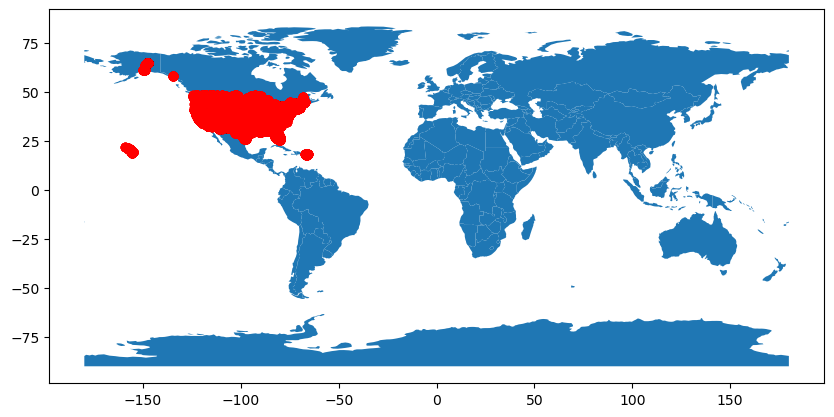

In [9]:
# plot monitors on a global map
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
# plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6))
gdf.plot(ax=ax, color='red')

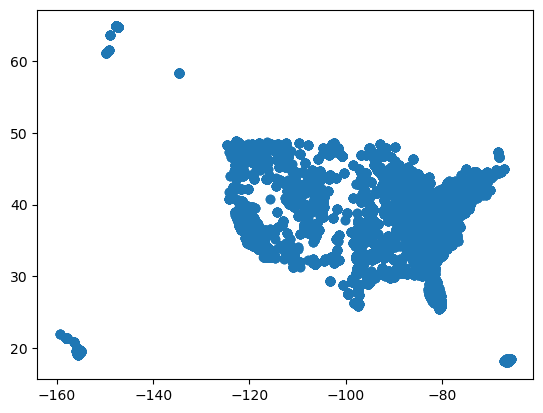

In [10]:
# plot monitors on simple scatter plot
plt.scatter(df['Longitude'], df['Latitude'])
plt.show()

In [13]:
# function to find season for each observation

# choose an arbitrary year to ensure you can compare months and days between any dataset and this function
Y = 2000

def seasons(x):
    x = x.replace(year=Y)
    if (x >= datetime(Y, 3, 21)) and (x <= datetime(Y, 6, 20)):
        return 'Spring'
    elif (x >= datetime(Y, 6, 21)) and (x <= datetime(Y, 9, 22)):
        return 'Summer'
    elif (x >= datetime(Y, 9, 23)) and (x <= datetime(Y, 12, 20)):
        return 'Fall'
    else:
        return 'Winter'        

<Axes: xlabel='season'>

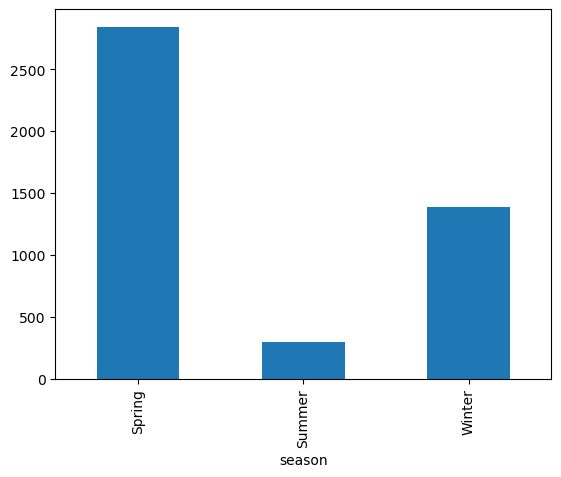

In [17]:
# extract ozone 1st Max Values and just specific columns
ozone_df = df[['Parameter Name','Longitude','Latitude','1st Max Value', '1st Max DateTime']].copy()
ozone_df = ozone_df[ozone_df['Parameter Name'] == 'Ozone']

# convert date, which is currently in a string format, to datetime format
ozone_df['date'] = pd.to_datetime(ozone_df['1st Max DateTime'])
# apply seasons function to date column
ozone_df['season'] = ozone_df['date'].apply(seasons)
# create a series that groups # of observations by season
grouped = ozone_df.groupby('season').size()
# plot series in a bar graph
grouped.plot(kind='bar') # no max values in fall....

C:\Users\kferguson32\AppData\Local\Temp\ipykernel_23456\2728685263.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

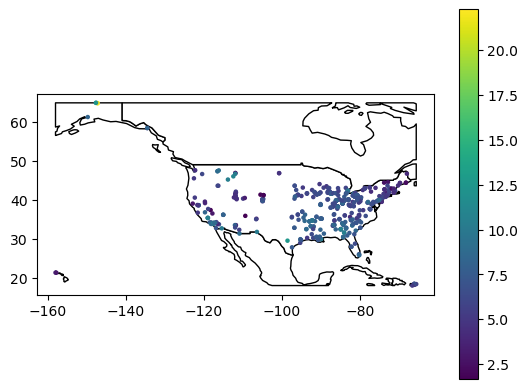

In [97]:
# extract PM2.5 - Local Conditions averages with all columns
pm_df = df.loc[(df['Parameter Name'] == 'PM2.5 - Local Conditions') & (df['Pollutant Standard'] == 'PM25 Annual 2024') & (df['Sample Duration'] == '24 HOUR')].copy()
# print(len(pm_df))

#find unique combinations of state, count, and monitor code, method 2
unique_monitors = df.groupby(['State Code', 'County Code','Site Num']).ngroups
# print(unique_monitors)

#find unique combinations of state, count, and monitor code, method 2
uniques = df[['State Code', 'County Code','Site Num']].drop_duplicates().shape[0]
# print(f"number of unique combinations of state, county and monitor code: \n\t{uniques}")

# plot monitors on a global map but have different colors depending on annual average PM2.5 concentration
geometry = [Point(xy) for xy in zip(pm_df['Longitude'], pm_df['Latitude'])]
gdf = gpd.GeoDataFrame(pm_df, geometry=geometry)
# plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
axis_range = [pm_df['Longitude'].min(), pm_df['Latitude'].min(), pm_df['Longitude'].max(), pm_df['Latitude'].max()]
ax = world.clip(axis_range).plot(color="white", edgecolor="black")
data_range = [pm_df['Arithmetic Mean'].min(), pm_df['Arithmetic Mean'].max()]

gdf.plot(column = 'Arithmetic Mean', ax=ax, markersize=5, cmap='viridis', vmin = data_range[0], vmax = data_range[1], marker='o', legend=True)